MAJOR PROJECT    II

K Means Clustering


We are using "Seeds" dataset.

1.Create Dataframe

In [ ]:
import pandas as pd
df=pd.read_csv('/content/seeds_dataset.csv')
df

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...,...
205,206,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,207,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,208,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


2.Use df.info to see information about the dataframe , such as no of columns, entries, non-null count and so on.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    210 non-null    int64  
 1   area                  210 non-null    float64
 2   perimeter             210 non-null    float64
 3   compactness           210 non-null    float64
 4   lengthOfKernel        210 non-null    float64
 5   widthOfKernel         210 non-null    float64
 6   asymmetryCoefficient  210 non-null    float64
 7   lengthOfKernelGroove  210 non-null    float64
 8   seedType              210 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.9 KB


3.Since we are using only 2 attributes (area and asymmetryCoefficient) , we use sclicing to remove other unnecessary columns.

In [ ]:
x= df.iloc[:,[1,6]].values
x

array([[15.26  ,  2.221 ],
       [14.88  ,  1.018 ],
       [14.29  ,  2.699 ],
       [13.84  ,  2.259 ],
       [16.14  ,  1.355 ],
       [14.38  ,  2.462 ],
       [14.69  ,  3.586 ],
       [14.11  ,  2.7   ],
       [16.63  ,  2.04  ],
       [16.44  ,  1.969 ],
       [15.26  ,  4.543 ],
       [14.03  ,  1.717 ],
       [13.89  ,  3.986 ],
       [13.78  ,  3.136 ],
       [13.74  ,  2.932 ],
       [14.59  ,  4.185 ],
       [13.99  ,  5.234 ],
       [15.69  ,  1.599 ],
       [14.7   ,  1.767 ],
       [12.72  ,  4.102 ],
       [14.16  ,  3.072 ],
       [14.11  ,  2.688 ],
       [15.88  ,  0.7651],
       [12.08  ,  1.415 ],
       [15.01  ,  1.791 ],
       [16.19  ,  0.903 ],
       [13.02  ,  3.373 ],
       [12.74  ,  2.504 ],
       [14.11  ,  2.754 ],
       [13.45  ,  3.531 ],
       [13.16  ,  0.8551],
       [15.49  ,  3.412 ],
       [14.09  ,  3.92  ],
       [13.94  ,  2.124 ],
       [15.05  ,  2.129 ],
       [16.12  ,  2.27  ],
       [16.2   ,  2.823 ],
 

4.Import matplotlib package.
Plot a Scatter Plot for 'area' and 'asymmetryCoefficient'.

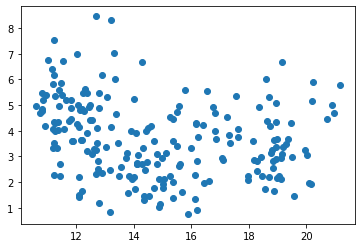

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['area'],df['asymmetryCoefficient'])

5.Import Numpy package.

Here, we find the number of clusters by using square root.
The number of clusters always ranges from 2 to the square root of the total number of elements.
The total number of elements is 210(here).

In [ ]:
import numpy as np
np.sqrt(210)
#no of clusters is k

14.491376746189438

6.We need to find out the number of clusters k

We can use two mwthods:

1.ELBOW METHOD  
2.SILHOUETTE SCORE METHOD

Let us start with Elbow Method

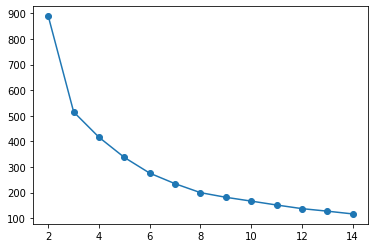

In [ ]:
#1.ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,15)

sse = []#sum of sq errors value

for i in k :
  model_demo = KMeans(n_clusters = i,random_state=0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)  # sum of squared erroe
plt.scatter(k,sse)
plt.plot(k,sse)


In [ ]:
#We shall consider the ELBOW POINT - point at which the elbow is more prominent
#we shall consider k as 2 for now , but we are not sure

Now, let us check using Silhouette Score Method

2 Clusters, Score = 0.505684206229276
3 Clusters, Score = 0.47131096514544457
4 Clusters, Score = 0.402285143663565
5 Clusters, Score = 0.37546557934247654
6 Clusters, Score = 0.38605993850067777
7 Clusters, Score = 0.3867049052759109
8 Clusters, Score = 0.38827145491552717
9 Clusters, Score = 0.3847367831601289
10 Clusters, Score = 0.3639074899267467
11 Clusters, Score = 0.366254212514478
12 Clusters, Score = 0.3479832195065669
13 Clusters, Score = 0.3694196607784604
14 Clusters, Score = 0.3491157138320221


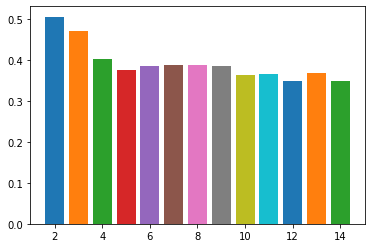

In [ ]:
#2.SILHOUTTE SCORE METHOD
from sklearn.metrics import silhouette_score
k=range(2,15)
for i in k:
  model_demo = KMeans(n_clusters= i,random_state=0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f"{i} Clusters, Score = {silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))

In [ ]:
#The Highest Score is for Cluster no.2 (the blue bar)
#confirmation : The number of clusters to be considered is 2

7.Once we are sure about the number of clusters (k value), we can go ahead and apply the KMeans Clusterer , using number of clusters=k

In [ ]:
#Apply clusterer
k=2
from sklearn.cluster import KMeans

model= KMeans(n_clusters=2, random_state=0)
model.fit(x)

KMeans(n_clusters=2, random_state=0)

Predicting the clusters for x (i.e, area and asymmetryCoefficient )

In [ ]:
y= model.predict(x)
y

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

As we can see, we have 2 clusters: cluster0 and cluster1

In [ ]:
y.size   #that means all 210 data elements are allocated to either cluster 0 or cluster 1

210

Let us find out the value of the inputs when say , cluster 0 is selected and column index 0 is selected. 

In [ ]:
x[y== 0,0]  # we have to consider cluster number 0 and column number 0 in x

array([15.26, 14.88, 14.29, 13.84, 14.38, 14.69, 14.11, 15.26, 14.03,
       13.89, 13.78, 13.74, 14.59, 13.99, 14.7 , 12.72, 14.16, 14.11,
       12.08, 15.01, 13.02, 12.74, 14.11, 13.45, 13.16, 14.09, 13.94,
       15.05, 14.8 , 14.28, 13.54, 13.5 , 13.16, 15.5 , 15.11, 13.8 ,
       14.99, 14.79, 14.86, 14.43, 14.49, 14.33, 14.52, 15.03, 14.46,
       14.92, 12.11, 11.42, 11.23, 12.36, 13.22, 12.78, 12.88, 14.34,
       14.01, 14.37, 12.73, 15.38, 15.56, 15.38, 13.07, 13.32, 13.34,
       12.22, 11.82, 11.21, 11.43, 12.49, 12.7 , 10.79, 11.83, 12.01,
       12.26, 11.18, 11.36, 11.19, 11.34, 12.13, 11.75, 11.49, 12.54,
       12.02, 12.05, 12.55, 11.14, 12.1 , 12.44, 12.15, 11.35, 11.24,
       11.02, 11.55, 11.27, 11.4 , 10.83, 10.8 , 11.26, 10.74, 11.48,
       12.21, 11.41, 12.46, 12.19, 11.65, 12.89, 11.56, 11.81, 10.91,
       11.23, 10.59, 10.93, 11.27, 11.87, 10.82, 12.11, 12.8 , 12.79,
       13.37, 12.62, 12.76, 12.38, 12.67, 11.18, 12.7 , 12.37, 12.19,
       11.23, 13.2 ,

Now, to find number of pairs(since we consider 2 cols) in each cluster:

In [ ]:
np.unique(y,return_counts = True)                   # cluster0 has 130 pairs and cluster1 has 80 pairs

(array([0, 1], dtype=int32), array([130,  80]))

8.Finally , we can perform the visualiztion using scatter plot to show exactly which points belong to which cluster and the loaction of the centeroid within each cluster.

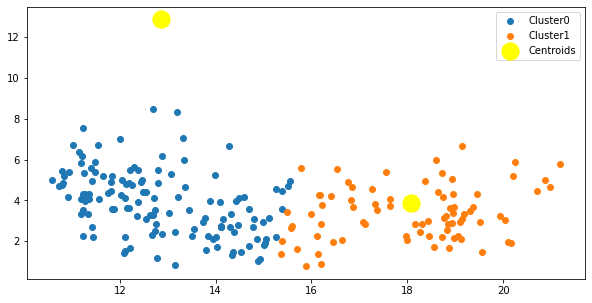

In [ ]:
#Final Visualization
plt.figure(figsize=(10,5))
for i in range(k) :
  plt.scatter(x[y==i,0],x[y==i,1], label= f'Cluster{i}')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:1],s=300,c='yellow',label='Centroids')
plt.legend()